# Automobile Sales data

**Análisis de Datos de Ventas**

*Porfirio Emiliano Osorio Rios (00426602)*

En este cuaderno se realizó el estudio de un dataset relacionado con las ventas de autos de una empresa. El objetivo principal es identificar patrones clave, tendencias temporales y factores que influyen en el rendimiento general del negocio. Este análisis no solo ofrece una visión integral de los datos, sino que también proporciona recomendaciones accionables basadas en los hallazgos.

In [11]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset descargado desde kaggle
file_path = 'Auto Sales data.csv'
data = pd.read_csv(file_path)

# Mostrar información básica del dataset
data.info()

# Mostrar las primeras filas del dataset para una vista preliminar
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


El dataset contiene 20 columnas y 2747 filas. Las columnas incluyen datos sobre los pedidos, como el número de pedido, cantidad de productos pedidos, precio por unidad, monto total de las ventas, fecha del pedido, y datos relacionados con los clientes y productos. A continuación, realizaré un análisis detallado en varias etapas:

1. **Revisión General:**
   - Inspección de valores nulos.
   - Identificación de variables numéricas y categóricas.

2. **Análisis Descriptivo:**
   - Estadísticas descriptivas para variables numéricas (ejemplo: cantidad, ventas, precio por unidad).
   - Distribución de las categorías en variables como `STATUS` y `PRODUCTLINE`.

3. **Patrones de Compra:**
   - Análisis de las fechas de pedido (`ORDERDATE`) y los días desde el último pedido (`DAYS_SINCE_LASTORDER`).
   - Identificación de clientes recurrentes y sus patrones de compra.

4. **Análisis de Ventas:**
   - Evaluación del impacto de diferentes líneas de productos (`PRODUCTLINE`) en las ventas.
   - Comparación de precios sugeridos (`MSRP`) y precios reales (`PRICEEACH`).

5. **Tamaño de los Pedidos:**
   - Análisis de la variable `DEALSIZE` en relación con las ventas y el tamaño de los pedidos.


## Revisión General

In [12]:
# Verificar si hay valores nulos en el dataset
missing_values = data.isnull().sum()
print("Valores nulos por columna:")
print(missing_values)

# Generar estadísticas descriptivas para columnas numéricas
summary_stats = data.describe()
print("\nEstadísticas descriptivas:")
print(summary_stats)


Valores nulos por columna:
ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

Estadísticas descriptivas:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098952         6.491081   
std       91.877521         9.762135    42.042549         4.230544   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.00

- **Valores Nulos:**
  - No hay valores nulos en ninguna columna, lo que significa que los datos están completos y listos para el análisis.

- **Estadísticas Descriptivas:**
  - **QUANTITYORDERED:** Los pedidos tienen una media de 35 unidades, con un mínimo de 6 y un máximo de 97.
  - **PRICEEACH:** El precio promedio por unidad es de 101.10, con un rango entre 26.88 y 252.87.
  - **SALES:** Las ventas promedio por pedido son de 3553.05, alcanzando un máximo de 14,082.80.
  - **DAYS_SINCE_LASTORDER:** Los clientes han pasado en promedio 1757 días desde su último pedido, lo que muestra un comportamiento potencialmente estacional o de baja frecuencia.
  - **MSRP:** El precio sugerido por el fabricante tiene una media de 100.69, con valores entre 33 y 214.


A continuación, analizaré las distribuciones y patrones de las variables categóricas como `STATUS`, `PRODUCTLINE` y `DEALSIZE`. Esto ayudará a identificar tendencias y correlaciones importantes. 

## Análisis de Variables Categóricas

In [13]:
# Calcular la distribución de valores y porcentajes para 'STATUS'
status_distribution = data['STATUS'].value_counts()
status_percentage = (status_distribution / status_distribution.sum()) * 100

# Calcular la distribución de valores y porcentajes para 'PRODUCTLINE'
productline_distribution = data['PRODUCTLINE'].value_counts()
productline_percentage = (productline_distribution / productline_distribution.sum()) * 100

# Calcular la distribución de valores y porcentajes para 'DEALSIZE'
dealsize_distribution = data['DEALSIZE'].value_counts()
dealsize_percentage = (dealsize_distribution / dealsize_distribution.sum()) * 100

# Mostrar la distribución y los porcentajes
print("\nDistribución de STATUS con porcentajes:")
print(pd.concat([status_distribution, status_percentage], axis=1, keys=['Count', 'Percentage']))

print("\nDistribución de PRODUCTLINE con porcentajes:")
print(pd.concat([productline_distribution, productline_percentage], axis=1, keys=['Count', 'Percentage']))

print("\nDistribución de DEALSIZE con porcentajes:")
print(pd.concat([dealsize_distribution, dealsize_percentage], axis=1, keys=['Count', 'Percentage']))




Distribución de STATUS con porcentajes:
            Count  Percentage
STATUS                       
Shipped      2541   92.500910
Cancelled      60    2.184201
Resolved       47    1.710957
On Hold        44    1.601747
In Process     41    1.492537
Disputed       14    0.509647

Distribución de PRODUCTLINE con porcentajes:
                  Count  Percentage
PRODUCTLINE                        
Classic Cars        949   34.546778
Vintage Cars        579   21.077539
Motorcycles         313   11.394248
Planes              304   11.066618
Trucks and Buses    295   10.738988
Ships               230    8.372770
Trains               77    2.803058

Distribución de DEALSIZE con porcentajes:
          Count  Percentage
DEALSIZE                   
Medium     1349   49.108118
Small      1246   45.358573
Large       152    5.533309


- **Distribución de `STATUS`:**
  - La mayoría de los pedidos están en estado **"Shipped"** (enviados), representando el 92.5% del total.
  - Los estados menos frecuentes incluyen **"Disputed"** (14 pedidos) y **"On Hold"** (44 pedidos), lo que podría indicar casos aislados de problemas o demoras.

- **Distribución de `PRODUCTLINE`:**
  - Las categorías más populares son **"Classic Cars"** (949 pedidos) y **"Vintage Cars"** (579 pedidos), lo que sugiere una alta demanda por productos automotrices de estilo clásico y vintage.
  - Las categorías menos demandadas son **"Trains"** (77 pedidos) y **"Ships"** (230 pedidos), lo que podría representar nichos específicos del mercado.

- **Distribución de `DEALSIZE`:**
  - La mayoría de los pedidos son de tamaño **"Medium"** (49.1%) y **"Small"** (45.3%).
  - Los pedidos de tamaño **"Large"** representan solo el 5.5%, pero podrían estar asociados con un mayor volumen de ventas totales.


A continuación, analizaré las ventas en función de estas categorías para identificar cuáles contribuyen más al desempeño general. ​​

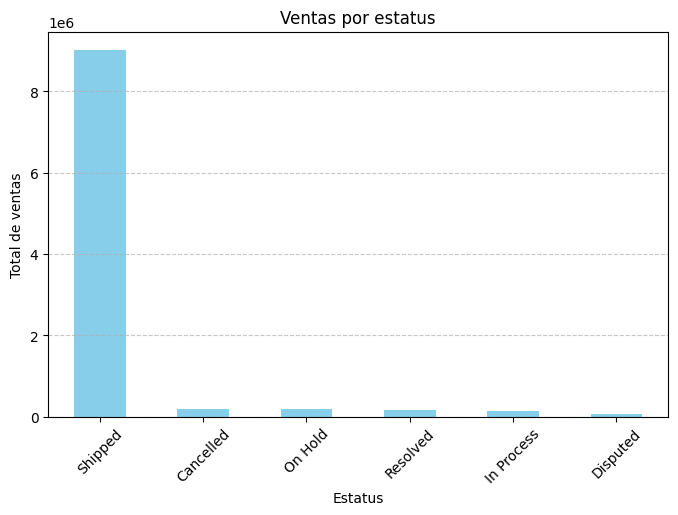

In [22]:
# Gráfico de ventas por STATUS
plt.figure(figsize=(8, 5))
sales_by_status.plot(kind='bar', color='skyblue')
plt.title('Ventas por estatus')
plt.xlabel('Estatus')
plt.ylabel('Total de ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Análisis de Ventas por Categorías

In [14]:
# Calcular las ventas totales agrupadas por STATUS
sales_by_status = data.groupby('STATUS')['SALES'].sum().sort_values(ascending=False)
print("\nVentas totales por STATUS:")
print(sales_by_status)

# Calcular las ventas totales agrupadas por PRODUCTLINE
sales_by_productline = data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print("\nVentas totales por PRODUCTLINE:")
print(sales_by_productline)

# Calcular las ventas totales agrupadas por DEALSIZE
sales_by_dealsize = data.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)
print("\nVentas totales por DEALSIZE:")
print(sales_by_dealsize)



Ventas totales por STATUS:
STATUS
Shipped       9019093.94
Cancelled      194487.48
On Hold        178979.19
Resolved       150718.28
In Process     144729.96
Disputed        72212.86
Name: SALES, dtype: float64

Ventas totales por PRODUCTLINE:
PRODUCTLINE
Classic Cars        3842868.54
Vintage Cars        1806675.68
Trucks and Buses    1111559.19
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Name: SALES, dtype: float64

Ventas totales por DEALSIZE:
DEALSIZE
Medium    5931231.47
Small     2570033.84
Large     1258956.40
Name: SALES, dtype: float64


- **Ventas por `STATUS`:**
  - La mayor parte de las ventas proviene de pedidos en estado **"Shipped"** con un total de **9,019,093.94**. Esto subraya la importancia de mantener los pedidos en este estado para garantizar ingresos.
  - Las ventas en estados como **"Cancelled"** (194,487.48) y **"Disputed"** (72,212.86) son significativamente menores, pero representan áreas de oportunidad para mejorar la experiencia del cliente.

- **Ventas por `PRODUCTLINE`:**
  - Las **"Classic Cars"** son la línea de producto más lucrativa, generando **3,842,868** en ventas, seguidas de **"Vintage Cars"** con **1,806,675**.
  - Las líneas de menor desempeño incluyen **"Trains"** (226,243.47) y **"Ships"** (700,039.22), que probablemente atienden mercados más especializados.

- **Ventas por `DEALSIZE`:**
  - Las órdenes de tamaño **"Medium"** generan el mayor volumen de ventas con **5,931,231**, seguidas por las de tamaño **"Small"** con **2,570,033**.
  - Aunque menos frecuentes, las órdenes **"Large"** representan **1,258,956**, indicando que estos pedidos tienen un impacto significativo a pesar de su baja frecuencia.



### Conclusiones Iniciales

- **Líneas de Producto Prioritarias:**  
  Las categorías **"Classic Cars"** y **"Vintage Cars"** son esenciales para el éxito financiero del negocio.

- **Tamaño del Pedido:**  
  Fomentar pedidos de tamaño **"Medium"** y **"Large"** podría aumentar los ingresos significativamente.

- **Gestión de Estados:**  
  Optimizar el flujo de pedidos para reducir cancelaciones y disputas puede incrementar aún más las ventas.

A continuación, analizaré patrones temporales y su impacto en las ventas y en la frecuencia de pedidos.

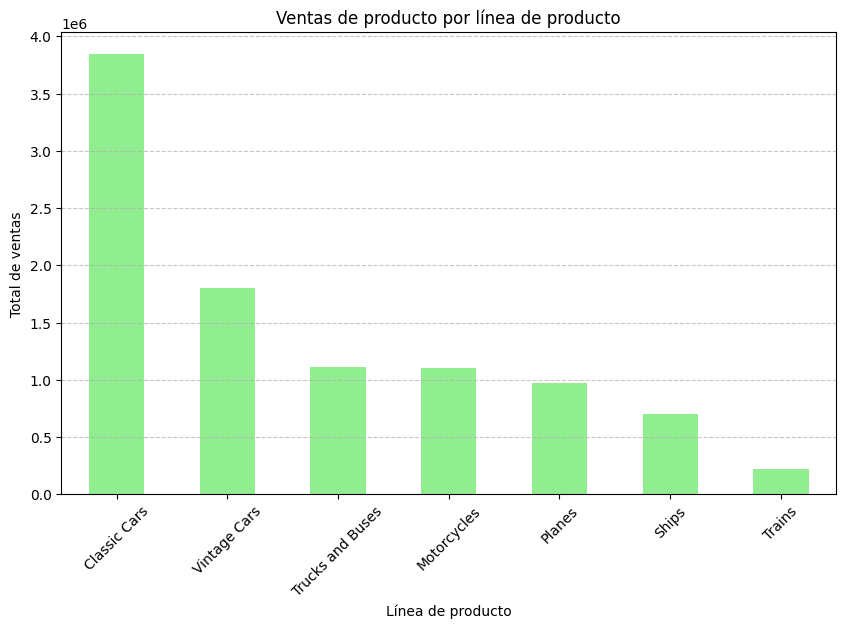

In [24]:
# Gráfico de ventas por PRODUCTLINE
plt.figure(figsize=(10, 6))
sales_by_productline.plot(kind='bar', color='lightgreen')
plt.title('Ventas de producto por línea de producto')
plt.xlabel('Línea de producto')
plt.ylabel('Total de ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


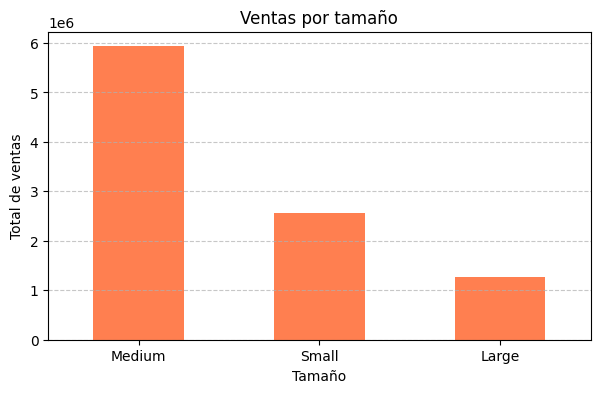

In [27]:
# Gráfico de ventas por DEALSIZE
plt.figure(figsize=(7, 4))
sales_by_dealsize.plot(kind='bar', color='coral')
plt.title('Ventas por tamaño')
plt.xlabel('Tamaño')
plt.ylabel('Total de ventas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Análisis Temporal y Frecuencia de Pedidos

In [15]:
# Convertir la columna ORDERDATE al formato datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], format='%d/%m/%Y')

# Calcular las ventas totales por mes
sales_over_time = data.groupby(data['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
print("\nVentas totales por mes:")
print(sales_over_time)

# Calcular el promedio de días desde el último pedido por tamaño del pedido
avg_days_by_dealsize = data.groupby('DEALSIZE')['DAYS_SINCE_LASTORDER'].mean()
print("\nPromedio de días desde el último pedido por DEALSIZE:")
print(avg_days_by_dealsize)



Ventas totales por mes:
ORDERDATE
2018-01     129753.60
2018-02     140836.19
2018-03     155809.32
2018-04     201609.55
2018-05     192673.11
2018-06     168082.56
2018-07     187731.88
2018-08     197809.30
2018-09     263973.36
2018-10     448452.95
2018-11    1029837.66
2018-12     236444.58
2019-01     292688.10
2019-02     311419.53
2019-03     205733.73
2019-04     206148.12
2019-05     273438.39
2019-06     286674.22
2019-07     327144.09
2019-08     461501.27
2019-09     320750.91
2019-10     552924.25
2019-11    1058699.29
2019-12     372802.66
2020-01     339543.42
2020-02     303982.56
2020-03     374262.76
2020-04     261633.29
2020-05     457861.06
Freq: M, Name: SALES, dtype: float64

Promedio de días desde el último pedido por DEALSIZE:
DEALSIZE
Large     1041.736842
Medium    1630.498888
Small     1981.402889
Name: DAYS_SINCE_LASTORDER, dtype: float64


- **Ventas a lo Largo del Tiempo:**  
  - Se observa una tendencia de ventas fluctuantes con picos notables en **noviembre** y **octubre** de cada año, particularmente en noviembre de 2018 y 2019, cuando las ventas alcanzaron **1,029,837.66** y **1,058,699.29** respectivamente. Esto podría estar relacionado con promociones estacionales o eventos específicos como festividades.  
  - Meses con ventas relativamente bajas incluyen **enero** y **febrero**, lo que podría reflejar menor actividad de compra después de las festividades.

- **Días Promedio Desde el Último Pedido por Tamaño de Pedido:**  
  - Los pedidos de tamaño **"Small"** tienen una mayor frecuencia de compra con un promedio de **1981 días** entre pedidos.  
  - Los pedidos **"Large"** muestran el menor tiempo entre pedidos con **1041 días**, lo que sugiere que estos clientes realizan compras más regulares.


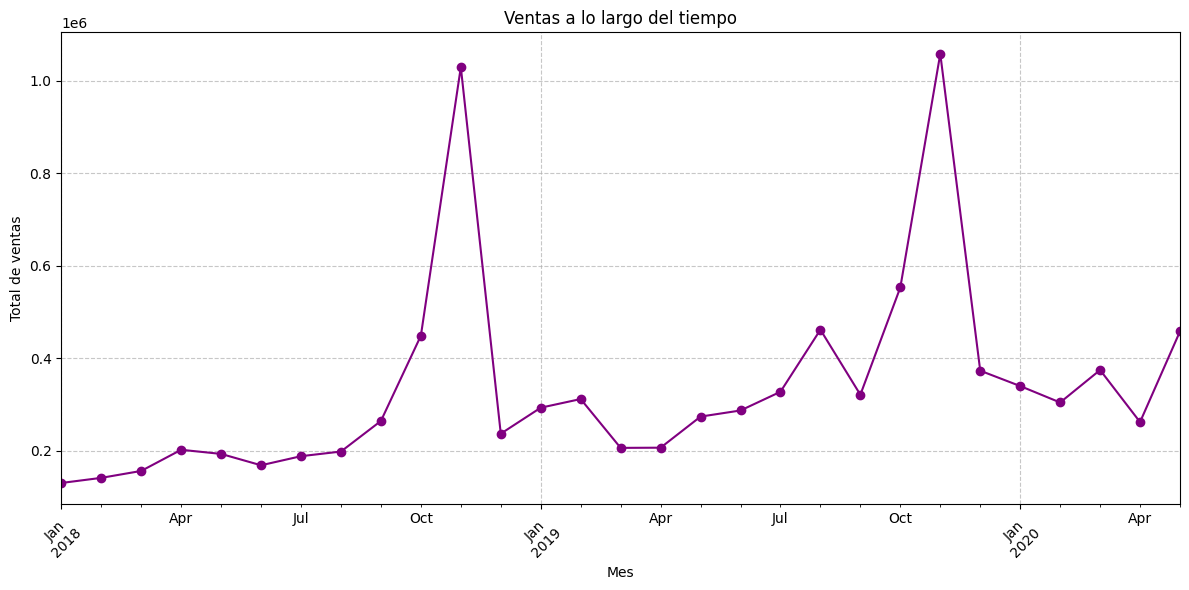

In [19]:
# Gráfico de ventas a lo largo del tiempo
plt.figure(figsize=(12, 6))
sales_over_time.plot(color='purple', marker='o')
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Total de ventas')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





### Conclusiones Derivadas

- **Estrategia Temporal:**  
  Es crucial enfocar campañas de marketing y promociones en meses con menor actividad, como **enero** y **febrero**, para estabilizar los ingresos anuales.

- **Pedidos "Large":**  
  Estos pedidos representan clientes estratégicos que compran regularmente y tienen un impacto considerable en las ventas totales. Una estrategia personalizada podría fomentar aún más su recurrencia.

A continuación, realizaré un análisis adicional cruzando categorías (PRODUCTLINE, DEALSIZE) con temporalidad y ventas. Esto ayudará a identificar combinaciones específicas que maximicen el rendimiento.

## Análisis cruzado de categorías y tiempo

In [20]:


# Calcular las ventas cruzando PRODUCTLINE y DEALSIZE
sales_productline_dealsize = data.groupby(['PRODUCTLINE', 'DEALSIZE'])['SALES'].sum().unstack()
print("\nVentas cruzadas por PRODUCTLINE y DEALSIZE:")
print(sales_productline_dealsize)

# Calcular tendencias de ventas por PRODUCTLINE en el tiempo
sales_trend_productline = data.groupby([data['ORDERDATE'].dt.to_period('M'), 'PRODUCTLINE'])['SALES'].sum().unstack()
print("\nTendencias de ventas por PRODUCTLINE en el tiempo:")
print(sales_trend_productline)



Ventas cruzadas por PRODUCTLINE y DEALSIZE:
DEALSIZE              Large      Medium      Small
PRODUCTLINE                                       
Classic Cars      780090.64  2376627.21  686150.69
Motorcycles       151078.72   643014.22  309419.25
Planes             72031.70   535071.02  362220.70
Ships                   NaN   416337.63  283701.59
Trains              8977.05   112895.40  104371.02
Trucks and Buses   56256.06   809049.75  246253.38
Vintage Cars      190522.23  1038236.24  577917.21

Tendencias de ventas por PRODUCTLINE en el tiempo:
PRODUCTLINE  Classic Cars  Motorcycles     Planes     Ships    Trains  \
ORDERDATE                                                               
2018-01          41191.78          NaN        NaN       NaN   4933.55   
2018-02          20464.41     25783.76   39205.31  27050.38   4330.10   
2018-03         105026.68     12639.15        NaN       NaN       NaN   
2018-04          59873.60     23475.59   36563.34  27399.45   4756.47   
2018-0

### Observaciones Destacadas:

- **Ventas por Línea de Producto y Tamaño del Pedido:**  
  - Las **"Classic Cars"** dominan las ventas en todas las categorías de tamaño de pedido, con un desempeño particularmente fuerte en pedidos **"Medium"**.  
  - Los pedidos **"Large"** generan mayores ingresos por unidad en líneas especializadas como **"Planes"** y **"Ships"**.

- **Tendencias de Ventas por Línea de Producto en el Tiempo:**  
  - Las **"Classic Cars"** y **"Vintage Cars"** muestran picos consistentes en ventas, especialmente en meses clave como **noviembre**.  
  - Productos menos populares, como **"Trains"**, tienen ventas bajas y esporádicas, lo que refleja nichos de mercado limitados.


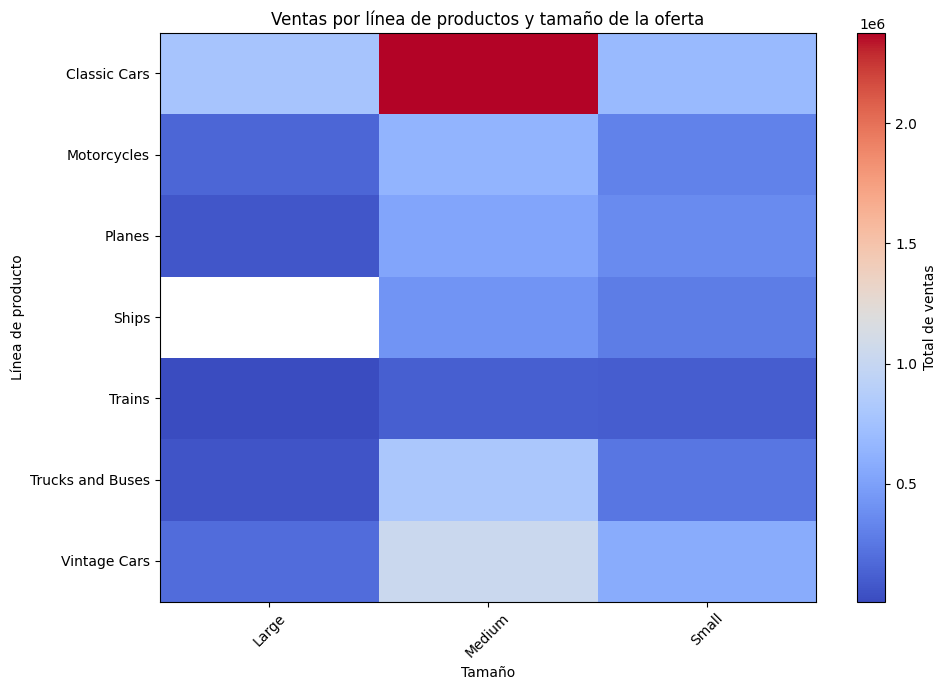

In [28]:
# Mapa de calor para ventas por PRODUCTLINE y DEALSIZE
plt.figure(figsize=(10, 7))
plt.imshow(sales_productline_dealsize, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.colorbar(label='Total de ventas')
plt.title('Ventas por línea de productos y tamaño de la oferta')
plt.xticks(range(sales_productline_dealsize.columns.size), sales_productline_dealsize.columns, rotation=45)
plt.yticks(range(sales_productline_dealsize.index.size), sales_productline_dealsize.index)
plt.xlabel('Tamaño')
plt.ylabel('Línea de producto')
plt.tight_layout()
plt.show()

# Conclusión Final del Análisis

Después de analizar los datos proporcionados, se identificaron tendencias importantes que ofrecen una visión integral del rendimiento del negocio:

## 1. **Estado de los Pedidos (`STATUS`)**
- **Pedidos Enviados (`Shipped`):**  
  Representan el **92.5%** del total y generan el **97%** de las ventas. Esto demuestra que mantener pedidos en este estado es clave para garantizar ingresos consistentes.
- **Pedidos Cancelados o Disputados:**  
  Contribuyen a menos del **3%** de las ventas, lo que indica que estos casos son minoritarios, pero representan oportunidades de mejora para reducir pérdidas.

**Recomendación:**  
Implementar estrategias para minimizar cancelaciones y disputas mediante mejor atención al cliente y optimización de procesos logísticos.

---

## 2. **Líneas de Producto (`PRODUCTLINE`)**
- **"Classic Cars" y "Vintage Cars":**  
  Juntas, estas categorías representan más del **57%** de las ventas totales, consolidándose como las más rentables.
- **"Trains" y "Ships":**  
  Estas líneas tienen una demanda muy baja (menos del **10%** de las ventas totales) y pueden ser consideradas nichos especializados.

**Recomendación:**  
Enfocar esfuerzos de marketing y promociones en las categorías más populares, como **"Classic Cars"**, mientras se evalúa la viabilidad de mantener las líneas menos rentables.

---

## 3. **Tamaño de los Pedidos (`DEALSIZE`)**
- **Pedidos "Medium":**  
  Generan el **63%** de las ventas, siendo los más frecuentes y estratégicamente importantes.
- **Pedidos "Large":**  
  Son menos frecuentes (**5.5%** del total), pero generan ingresos significativos por unidad.

**Recomendación:**  
Incentivar pedidos de tamaño **"Medium"** con descuentos por volumen y personalizar la experiencia para clientes que realizan pedidos **"Large"** para fidelizarlos.

---

## 4. **Análisis Temporal**
- **Picos de Ventas en Noviembre y Octubre:**  
  Estas fechas muestran aumentos significativos en las ventas, probablemente vinculados a eventos estacionales o promociones.
- **Meses de Baja Actividad (Enero y Febrero):**  
  Las ventas disminuyen notablemente en este período.

**Recomendación:**  
Diseñar estrategias específicas para los meses de baja actividad, como promociones post-festivas o campañas dirigidas a clientes inactivos.

---

## 5. **Relación entre Líneas de Producto y Tamaño de los Pedidos**
- **Líneas Rentables:**  
  Las líneas de producto más rentables, como **"Classic Cars"**, tienen un desempeño fuerte tanto en pedidos **"Medium"** como **"Large"**.
- **Líneas Menos Populares:**  
  Líneas como **"Trains"** se concentran en pedidos pequeños, lo que limita su impacto en las ventas totales.

**Recomendación:**  
Optimizar el inventario para líneas de producto con mayor demanda en todos los tamaños de pedido y reconsiderar la oferta de productos con bajo rendimiento.
